In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
df['affairs']=(df['affairs']>0).astype(int)

In [4]:
df.affairs.value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [5]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


##### The dataset contains 6366 observations of 9 variables:

##### rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
##### age: woman's age
##### yrs_married: number of years married
##### children: number of children
##### religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
##### educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate ##### school, 20 = advanced degree)
##### occupation: woman's occupation (1 = student, 2 = farming/semi-
##### skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional ##### with advanced degree)
##### occupation_husb: husband's occupation (same coding as above)
##### affairs: time spent in extra-marital affairs

In [6]:
df.educ.replace({9:1, 12:2, 14:3, 16:4, 17:5, 20:6}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


In [8]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [9]:
pd.unique(df.occupation)

array([2., 3., 5., 4., 1., 6.])

In [10]:
a=np.array([0.1245])
print(type(a))
a[0].astype(int)
print(type(a))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


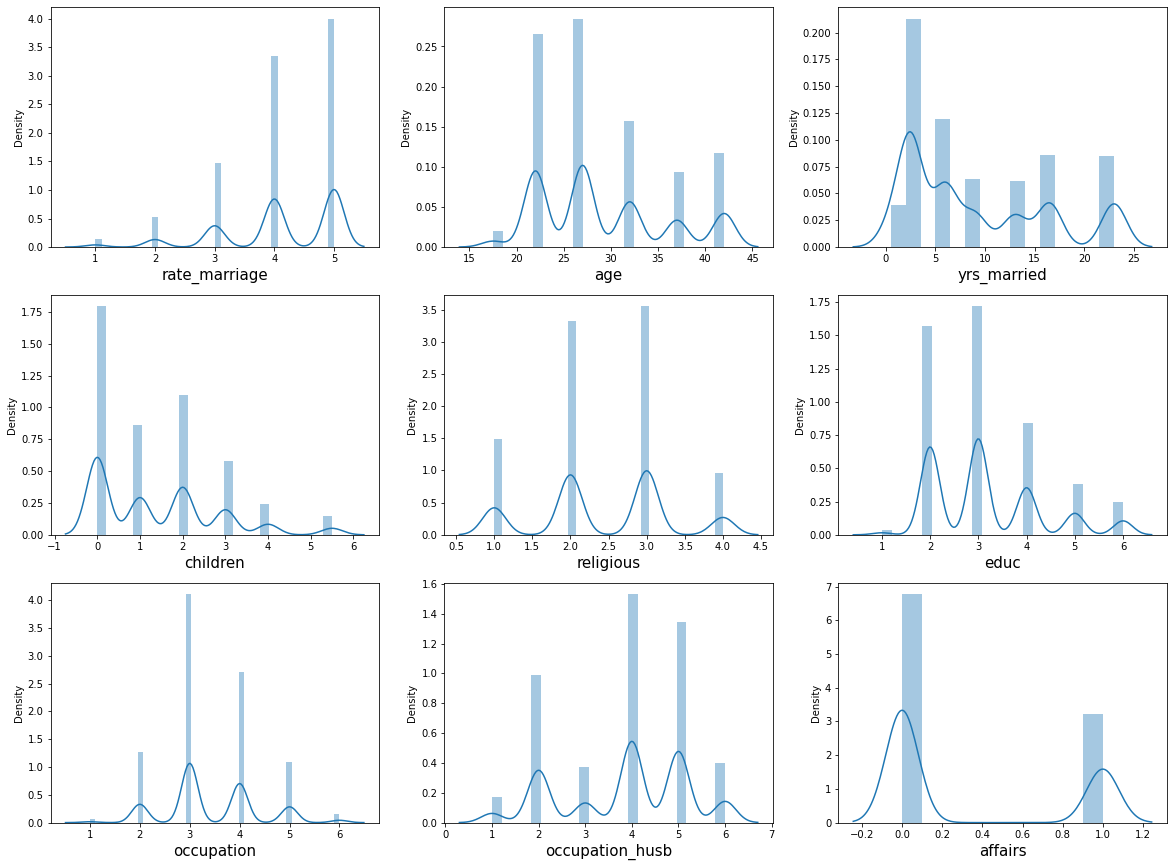

In [11]:
j=1
plt.figure(figsize=(20,15), facecolor='white')
for i in df:
    ax=plt.subplot(3, 3, j)
    sns.distplot(df[i])
    plt.xlabel(i, fontsize=15)
    j+=1
plt.show()

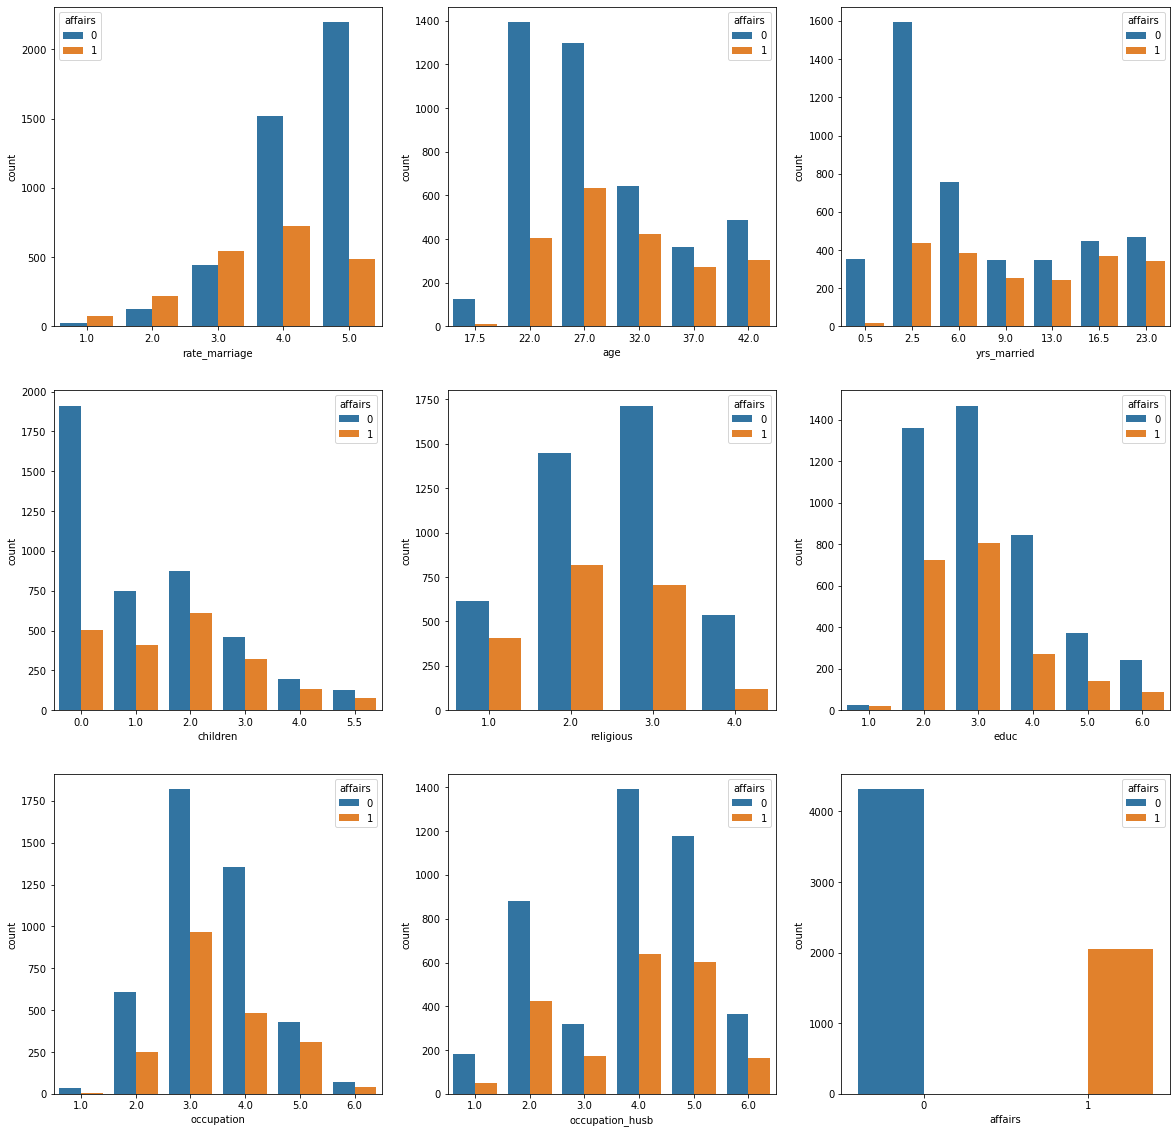

In [12]:
k=1
plt.figure(figsize=(20,20), facecolor='white')
for i in df:
    ax=plt.subplot(3,3,k)
    sns.countplot(x=i, data=df, hue='affairs')
    plt.xlabel(i)
    k+=1
plt.show()

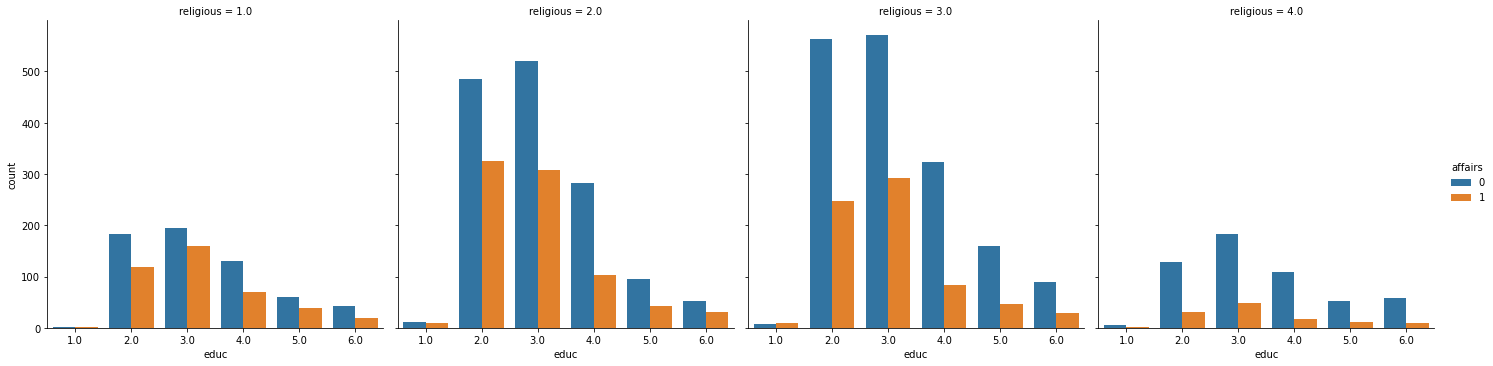

In [13]:
sns.catplot(x='educ', data=df, hue='affairs', kind="count", col='religious')

<AxesSubplot:>

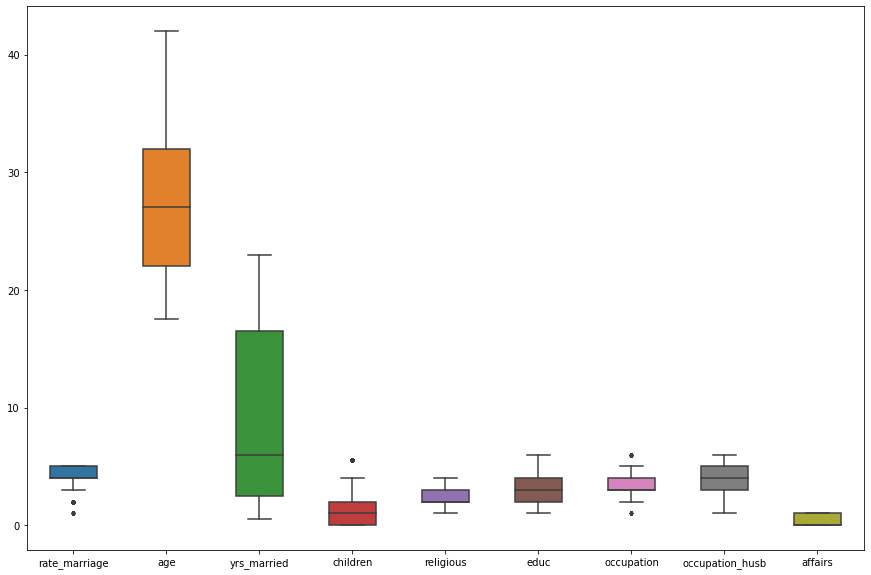

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [15]:
y, x = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
df, return_type="dataframe")

In [16]:
x

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,5.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,3.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,4.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,4.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,5.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,4.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,3.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,3.0


In [17]:
y

,affairs
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [18]:
y=np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [19]:
x=x.rename(columns=
          {
              'C(occupation)[T.2.0]':'occ_2',
              'C(occupation)[T.3.0]':'occ_3',
              'C(occupation)[T.4.0]':'occ_4',
              'C(occupation)[T.5.0]':'occ_5',
              'C(occupation)[T.6.0]':'occ_6',
              'C(occupation_husb)[T.2.0]':'occ_husb_2',
              'C(occupation_husb)[T.3.0]':'occ_husb_3',
              'C(occupation_husb)[T.4.0]':'occ_husb_4',
              'C(occupation_husb)[T.5.0]':'occ_husb_5',
              'C(occupation_husb)[T.6.0]':'occ_husb_6'
          })

In [20]:
x.Intercept.value_counts()

1.0    6366
Name: Intercept, dtype: int64

In [21]:
x.drop(columns=['Intercept'], inplace=True)
x.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,5.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,4.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,3.0


In [22]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 2.531984  , -0.88131913, -0.63614294, ...,  1.11844056,
         0.65334148,  1.62498884],
       [-0.3949472 ,  1.13466276, -0.63614294, ...,  1.11844056,
        -1.62378518, -0.13057823],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -1.62378518,  0.74720531],
       ...,
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -0.48522185, -0.13057823],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.27688404,
         0.65334148, -0.13057823],
       [ 2.531984  , -0.88131913, -0.63614294, ..., -0.97454634,
        -0.48522185,  0.74720531]])

In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,19.341593,occ_2
1,39.349973,occ_3
2,32.934761,occ_4
3,17.058875,occ_5
4,3.693842,occ_6
5,5.566471,occ_husb_2
6,2.990998,occ_husb_3
7,6.931379,occ_husb_4
8,6.577446,occ_husb_5
9,3.185508,occ_husb_6


As we can see first 3 features have high VIF factor means they have high multi-colinearity. So, now we have to remove one of these feature to reduce the VIF factor

In [24]:
x.drop(columns=['occ_3'], inplace=True)
x.head()

,occ_2,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,4.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,3.0


In [25]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 2.531984  , -0.63614294, -0.36267364, ...,  1.11844056,
         0.65334148,  1.62498884],
       [-0.3949472 , -0.63614294, -0.36267364, ...,  1.11844056,
        -1.62378518, -0.13057823],
       [-0.3949472 , -0.63614294, -0.36267364, ..., -0.97454634,
        -1.62378518,  0.74720531],
       ...,
       [-0.3949472 , -0.63614294, -0.36267364, ..., -0.97454634,
        -0.48522185, -0.13057823],
       [-0.3949472 , -0.63614294, -0.36267364, ..., -0.27688404,
         0.65334148, -0.13057823],
       [ 2.531984  , -0.63614294, -0.36267364, ..., -0.97454634,
        -0.48522185,  0.74720531]])

In [26]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.176865,occ_2
1,1.607489,occ_4
2,1.153045,occ_5
3,1.162578,occ_6
4,5.531153,occ_husb_2
5,2.976192,occ_husb_3
6,6.888190,occ_husb_4
7,6.533804,occ_husb_5
8,3.175477,occ_husb_6
9,1.038403,rate_marriage


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [27]:
scaled_features=pd.DataFrame(x_scaled, columns=x.columns)
scaled_features.head()

,occ_2,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,2.531984,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.624989
1,-0.394947,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.130578
2,-0.394947,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.747205
3,-0.394947,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,1.156235,1.028989,1.816103,0.653341,0.747205
4,-0.394947,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.130578


In [43]:
x_train,  x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0., random_state=12345)

In [44]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
log_reg.score(x_train, y_train)

0.7310431503979891

In [46]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [47]:
y_pred = log_reg.predict(x_test)

In [48]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.707286432160804

In [49]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[952, 120],
       [346, 174]], dtype=int64)

In [50]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [51]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.707286432160804

In [52]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8880597014925373

In [53]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7334360554699538

In [54]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8033755274261603

In [55]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6113375430539609

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

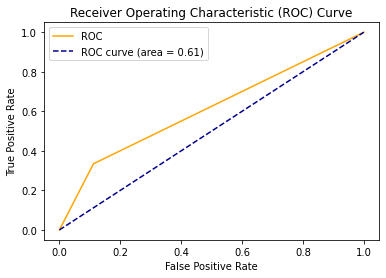

In [57]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()